In [17]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

# Load SARSA results from file
def load_results(filename):
    seeds = []
    eval_data = {}
    
    with open(filename, "r") as file:
        lines = file.readlines()
    
    current_seed = None
    eval_pattern = re.compile(r"EVALUATION: EP (\d+) - MEAN RETURN ([\d\.]+)")
    
    for line in lines:
        line = line.strip()
        if "Training" in line:
            current_seed = int(line.split("=")[-1])
            seeds.append(current_seed)
            eval_data[current_seed] = []
        
        match = eval_pattern.search(line)
        if match and current_seed is not None:
            episode = int(match.group(1))
            mean_return = float(match.group(2))
            eval_data[current_seed].append((episode, mean_return))
    
    return seeds, eval_data

results_filename = "data/q_learning_results_slippery.txt"
seeds, eval_data_q_learning = load_results(results_filename)
results_filename = "data/sarsa_results_slippery.txt"
_, eval_data_sarsa = load_results(results_filename)

results_filename = "data/q_learning_results_slippery_linear_decay.txt"
_,eval_data_q_learning_lr = load_results(results_filename)
results_filename = "data/sarsa_results_slippery_linear_decay.txt"
_,eval_data_sarsa_lr = load_results(results_filename)

In [16]:
def plot_training_progress(eval_data1, eval_data2, label1="Dataset 1", label2="Dataset 2", savefile=None):
    episodes1 = sorted(set(ep for seed_data in eval_data1.values() for ep, _ in seed_data))
    episodes2 = sorted(set(ep for seed_data in eval_data2.values() for ep, _ in seed_data))
    all_episodes = sorted(set(episodes1 + episodes2))  # Combine both episode lists
    
    def compute_means_and_stds(eval_data, episodes):
        mean_returns = []
        std_returns = []
        for ep in episodes:
            returns = [mean_return for seed_data in eval_data.values() for episode, mean_return in seed_data if episode == ep]
            if returns:
                mean_returns.append(np.mean(returns))
                std_returns.append(np.std(returns))
            else:
                mean_returns.append(np.nan)  # Handle missing data gracefully
                std_returns.append(np.nan)
        return np.array(mean_returns), np.array(std_returns)
    
    mean_returns1, std_returns1 = compute_means_and_stds(eval_data1, all_episodes)
    mean_returns2, std_returns2 = compute_means_and_stds(eval_data2, all_episodes)

    plt.figure(figsize=(8, 5))
    
    # Plot first dataset
    plt.plot(all_episodes, mean_returns1, label=label1, color='blue')
    plt.fill_between(all_episodes, mean_returns1 - std_returns1, mean_returns1 + std_returns1, color='blue', alpha=0.2)

    # Plot second dataset
    plt.plot(all_episodes, mean_returns2, label=label2, color='red')
    plt.fill_between(all_episodes, mean_returns2 - std_returns2, mean_returns2 + std_returns2, color='red', alpha=0.2)
    
    plt.xlabel('Episodes')
    plt.ylabel('Return')
    plt.title('Training Progress Across Seeds')
    plt.legend()
    plt.grid(True)
    plt.savefig(savefile)
    plt.show()


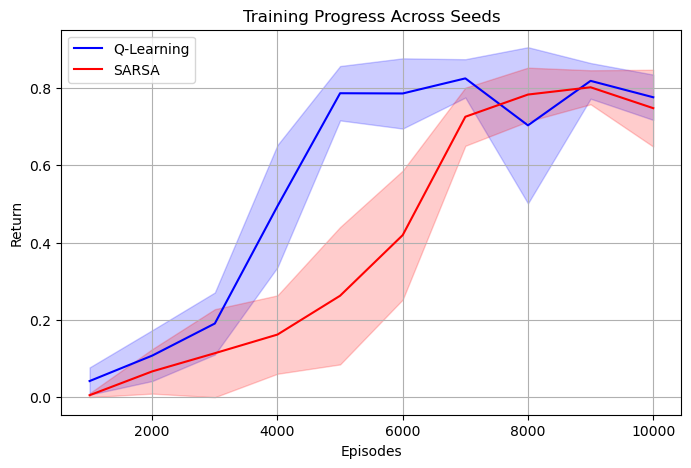

In [18]:
plot_training_progress(eval_data_q_learning, eval_data_sarsa, label1="Q-Learning", label2="SARSA", savefile = "data/training_progress.png" )

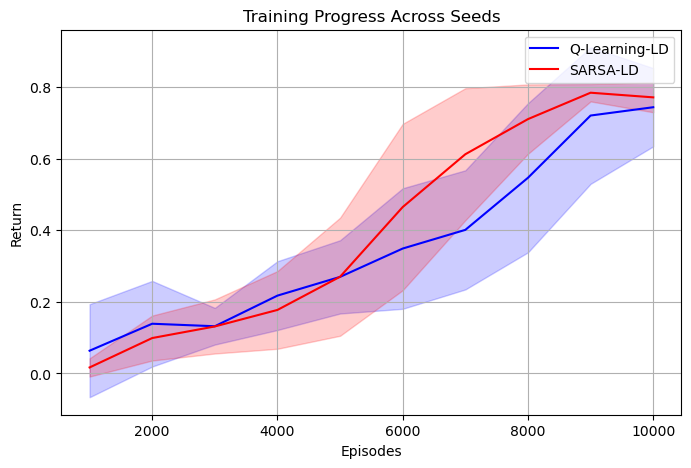

In [19]:
plot_training_progress(eval_data_q_learning_lr, eval_data_sarsa_lr, label1="Q-Learning-LD", label2="SARSA-LD", savefile = "data/training_progress_slippery.png" )

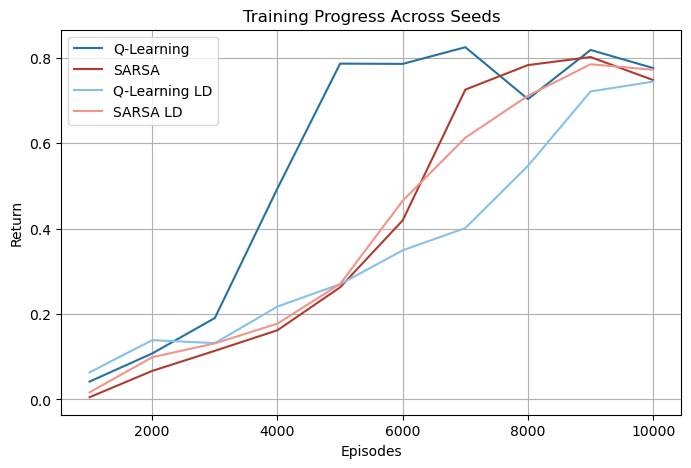

In [20]:
import matplotlib.pyplot as plt

def plot_training_progress(eval_data1, eval_data2, eval_data3, eval_data4, 
                           label1="Dataset 1", label2="Dataset 2", 
                           label3="Dataset 3", label4="Dataset 4", savefile=None):
    
    # Extract all unique episode numbers across datasets
    episodes1 = sorted(set(ep for seed_data in eval_data1.values() for ep, _ in seed_data))
    episodes2 = sorted(set(ep for seed_data in eval_data2.values() for ep, _ in seed_data))
    episodes3 = sorted(set(ep for seed_data in eval_data3.values() for ep, _ in seed_data))
    episodes4 = sorted(set(ep for seed_data in eval_data4.values() for ep, _ in seed_data))
    all_episodes = sorted(set(episodes1 + episodes2 + episodes3 + episodes4))  # Combine all episodes
    
    def compute_means(eval_data, episodes):
        mean_returns = []
        std_returns = []
        for ep in episodes:
            returns = [mean_return for seed_data in eval_data.values() for episode, mean_return in seed_data if episode == ep]
            if returns:
                mean_returns.append(np.mean(returns))
                #std_returns.append(np.std(returns))
            else:
                mean_returns.append(np.nan)  # Handle missing data
                std_returns.append(np.nan)
        return np.array(mean_returns)
    
    # Compute mean and std for each dataset
    mean_returns1 = compute_means(eval_data1, all_episodes)
    mean_returns2= compute_means(eval_data2, all_episodes)
    mean_returns3 = compute_means(eval_data3, all_episodes)
    mean_returns4 = compute_means(eval_data4, all_episodes)

    plt.figure(figsize=(8, 5))
    
    # Define colors for the datasets
    colors = ['#2471A3', "#B03A2E", '#85C1E9', '#F1948A']
    labels = [label1, label2, label3, label4]
    mean_returns = [mean_returns1, mean_returns2, mean_returns3, mean_returns4]
    
    # Plot each dataset with its confidence interval
    for i in range(4):
        plt.plot(all_episodes, mean_returns[i], label=labels[i], color=colors[i])

    plt.xlabel('Episodes')
    plt.ylabel('Return')
    plt.title('Training Progress Across Seeds')
    plt.legend()
    plt.grid(True)
    
    if savefile:
        plt.savefig(savefile)
    plt.show()

plot_training_progress(eval_data_q_learning, eval_data_sarsa, eval_data_q_learning_lr, eval_data_sarsa_lr,
                      label1="Q-Learning", label2="SARSA", label3="Q-Learning LD", label4="SARSA LD",
                      savefile="data/training_progress_all.png")